In [1]:
import os, sys, email
import pandas as pd
import numpy as np

df = pd.read_csv('./scripts/enron_emails.csv')
#sub_df = df.iloc[0:100, :]

df.head(5)

,file,email
0,allen-p/_sent_mail/1.txt,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.txt,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.txt,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.txt,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.txt,Message-ID: <30922949.1075863688243.JavaMail.e...


In [2]:
print(df['email'][0])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


In [3]:
def get_text_from_email(msg):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append(part.get_payload())
    return ''.join(parts)

def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x: x.strip(), addrs))
    else:
        addrs = None
    return addrs

In [4]:
messages = list(map(email.message_from_string, df['email']))
df.drop('email', axis=1, inplace=True)

keys = messages[0].keys()

for key in keys:
    df[key] = [doc[key] for doc in messages]

df['Body'] = list(map(get_text_from_email, messages))

df['From'] = df['From'].map(split_email_addresses)
df['To'] = df['To'].map(split_email_addresses)

df['User'] = df['file'].map(lambda x:x.split('/')[0])
del messages

df.head()

,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Body,User
0,allen-p/_sent_mail/1.txt,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",(phillip.allen@enron.com),(tim.belden@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.txt,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",(phillip.allen@enron.com),(john.lavorato@enron.com),Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.txt,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",(phillip.allen@enron.com),(leah.arsdall@enron.com),Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.txt,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",(phillip.allen@enron.com),(randall.gay@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.txt,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",(phillip.allen@enron.com),(greg.piper@enron.com),Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p


In [5]:
print('shape of the dataframe:', df.shape)
# Find number of unique values in each columns
print('ColumnName: ', 'Unique_Total', '|', 'NaN_Total')
for col in df.columns:
    print(col, ': ', df[col].nunique(), '|', df[col].isna().sum())
    
df.dtypes

shape of the dataframe: (517401, 18)
ColumnName:  Unique_Total | NaN_Total
file :  517401 | 0
Message-ID :  517401 | 0
Date :  224128 | 0
From :  20328 | 0
To :  54748 | 21847
Subject :  159290 | 0
Mime-Version :  1 | 29
Content-Type :  2 | 29
Content-Transfer-Encoding :  3 | 29
X-From :  27980 | 29
X-To :  73552 | 29
X-cc :  33701 | 29
X-bcc :  132 | 29
X-Folder :  5335 | 29
X-Origin :  259 | 29
X-FileName :  429 | 29
Body :  249025 | 0
User :  150 | 0


file                         object
Message-ID                   object
Date                         object
From                         object
To                           object
Subject                      object
Mime-Version                 object
Content-Type                 object
Content-Transfer-Encoding    object
X-From                       object
X-To                         object
X-cc                         object
X-bcc                        object
X-Folder                     object
X-Origin                     object
X-FileName                   object
Body                         object
User                         object
dtype: object

In [6]:
# Set index and drop columns with two few values
df = df.set_index('Message-ID').drop(['file', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding'], axis=1)
# Parse datetime
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, utc=True)

df.dtypes

Date          datetime64[ns, UTC]
From                       object
To                         object
Subject                    object
X-From                     object
X-To                       object
X-cc                       object
X-bcc                      object
X-Folder                   object
X-Origin                   object
X-FileName                 object
Body                       object
User                       object
dtype: object

In [7]:
df.head()

,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Body,User
Message-ID,,,,,,,,,,,,,
<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00+00:00,(phillip.allen@enron.com),(tim.belden@enron.com),,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p
<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00+00:00,(phillip.allen@enron.com),(john.lavorato@enron.com),Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p
<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00+00:00,(phillip.allen@enron.com),(leah.arsdall@enron.com),Re: test,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p
<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00+00:00,(phillip.allen@enron.com),(randall.gay@enron.com),,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p
<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00+00:00,(phillip.allen@enron.com),(greg.piper@enron.com),Re: Hello,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p


In [8]:
df.to_csv('preprocessed_enron.csv')

Text(0, 0.5, 'N° emails')

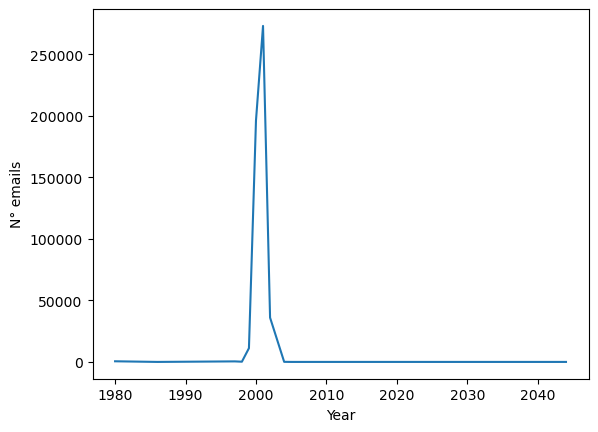

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns
#sns.set_style('whitegrid')

#import networkx as nx

#from nltk.tokenize.regexp import RegexpTokenizer

ax = df.groupby(df['Date'].dt.year)['Body'].count().plot()
ax.set_xlabel('Year')
ax.set_ylabel('N° emails')

Text(0, 0.5, 'N° emails')

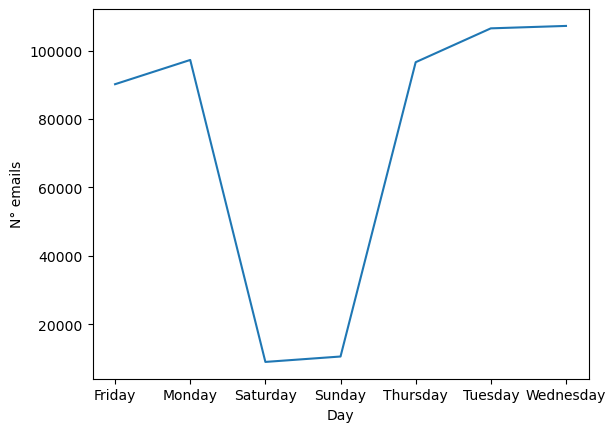

In [10]:
ax = df.groupby(df['Date'].dt.day_name())['Body'].count().plot()
ax.set_xlabel('Day')
ax.set_ylabel('N° emails')

Text(0, 0.5, 'N emails')

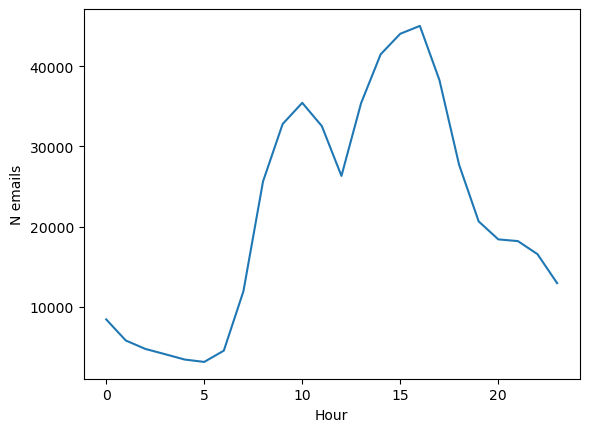

In [11]:
ax = df.groupby(df['Date'].dt.hour)['Body'].count().plot()
ax.set_xlabel('Hour')
ax.set_ylabel('N emails')

(-0.5, 799.5, 599.5, -0.5)

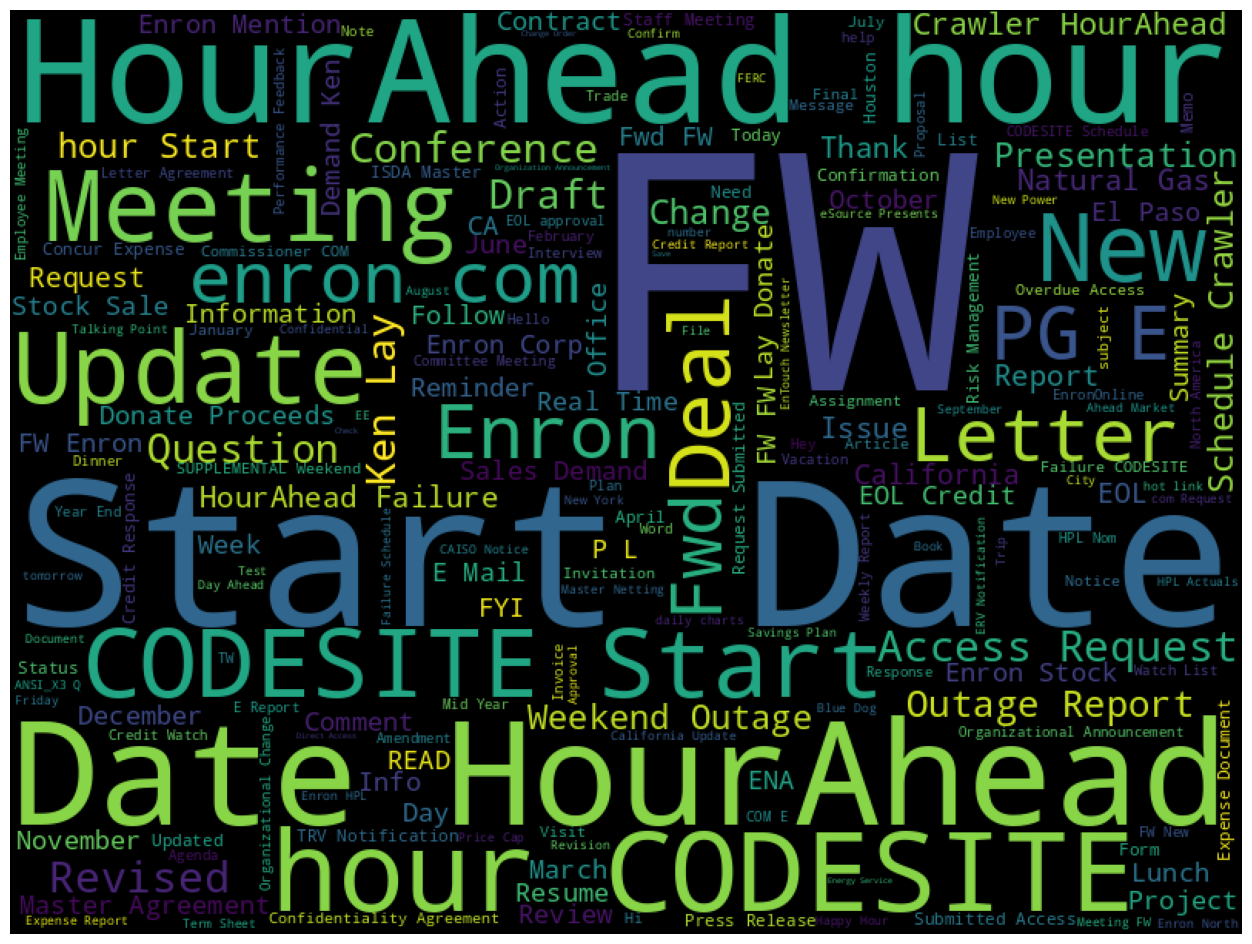

In [12]:
import wordcloud
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

subjects = ' '.join(df['Subject'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")

In [2]:
import pandas as pd

df = pd.read_csv('preprocessed_enron.csv')

df.head(5)

,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Body,User
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00+00:00,frozenset({'phillip.allen@enron.com'}),frozenset({'tim.belden@enron.com'}),NaN,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p
1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00+00:00,frozenset({'phillip.allen@enron.com'}),frozenset({'john.lavorato@enron.com'}),Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p
2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00+00:00,frozenset({'phillip.allen@enron.com'}),frozenset({'leah.arsdall@enron.com'}),Re: test,Phillip K Allen,Leah Van Arsdall,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00+00:00,frozenset({'phillip.allen@enron.com'}),frozenset({'randall.gay@enron.com'}),NaN,Phillip K Allen,Randall L Gay,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00+00:00,frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'}),Re: Hello,Phillip K Allen,Greg Piper,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p


(-0.5, 799.5, 599.5, -0.5)

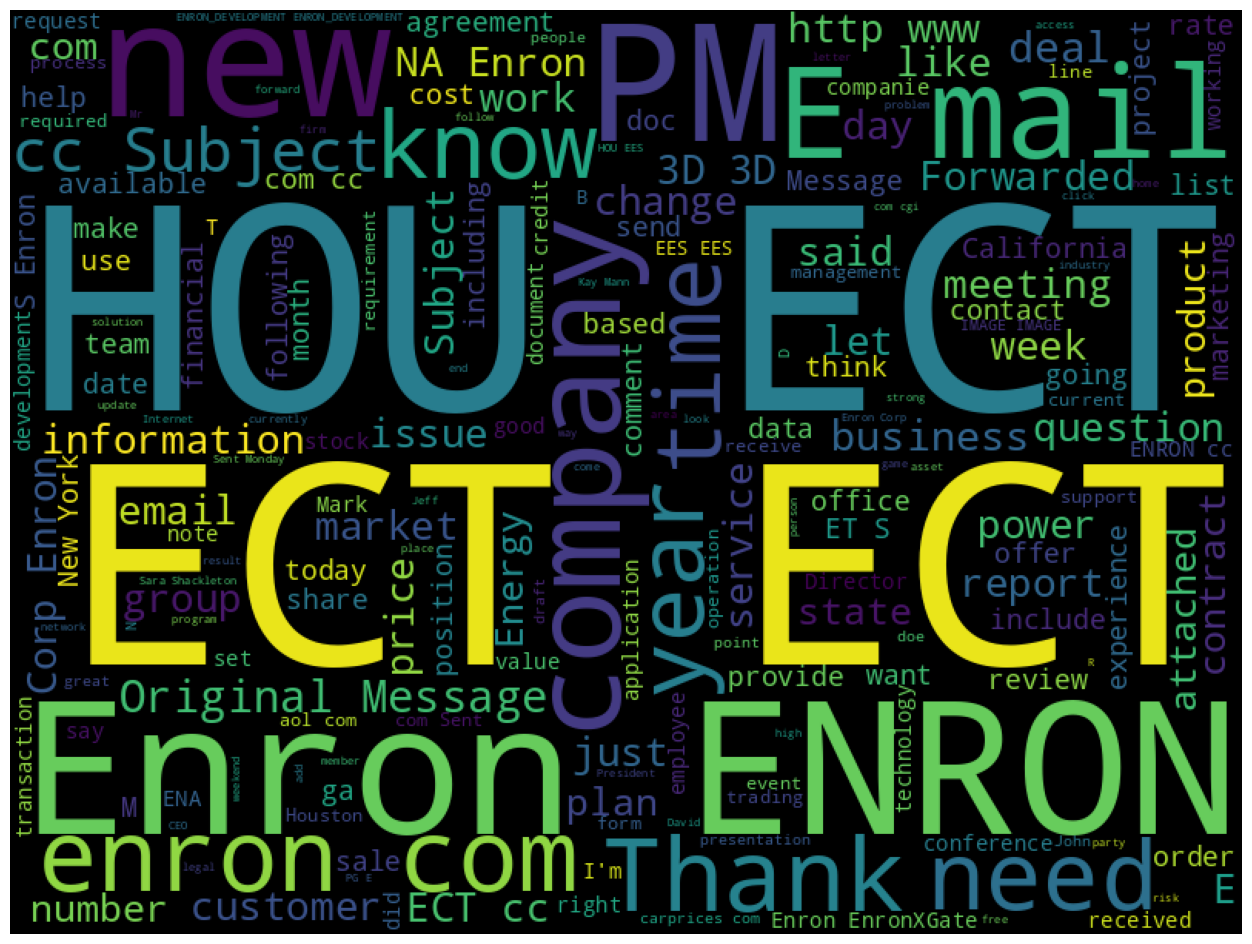

In [5]:
import wordcloud
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
%matplotlib inline

subjects = ' '.join(df.sample(1000)['Body'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")